This version of the snake game allows you to implement and run your evolutionary algorithm

In [1]:
import random
import time
import turtle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
XSIZE = YSIZE = 16 # Number of grid cells in each direction (do not change this)

Change headless to True when evolving your solution. You can then pickle your final solution, and run it with this set to True to visualize the result, if you wish. Note that, when using Turtle,  to run it again properly you might need to go to restart your kernel after the visualization has finished.

If you are running on the cloud, or on Google Colab, you can chose to remove the turtle and display code altogether and only run headless. You could then pickle your best solution and use this code to see it play.

In [3]:
HEADLESS = True

In [4]:
class DisplayGame:
    def __init__(self, XSIZE, YSIZE):
        # SCREEN
        self.win = turtle.Screen()
        self.win.title("EVCO Snake game")
        self.win.bgcolor("grey")
        self.win.setup(width=(XSIZE*20)+40,height=(YSIZE*20)+40)
        #self.win.screensize((XSIZE*20)+20,(YSIZE*20)+20)
        self.win.tracer(0)

        #Snake Head
        self.head = turtle.Turtle()
        self.head.shape("square")
        self.head.color("black")

        # Snake food
        self.food = turtle.Turtle()
        self.food.shape("circle")
        self.food.color("yellow")
        self.food.penup()
        self.food.shapesize(0.55, 0.55)
        self.segments = []

    def reset(self, snake):
        self.segments = []
        self.head.penup()
        self.food.goto(-500, -500)
        self.head.goto(-500, -500)
        for i in range(len(snake)-1):
            self.add_snake_segment()
        self.update_segment_positions(snake)
       
    def update_food(self,new_food):
        self.food.goto(((new_food[1]-9)*20)+20, (((9-new_food[0])*20)-10)-20)
        
    def update_segment_positions(self, snake):
        self.head.goto(((snake[0][1]-9)*20)+20, (((9-snake[0][0])*20)-10)-20)
        for i in range(len(self.segments)):
            self.segments[i].goto(((snake[i+1][1]-9)*20)+20, (((9-snake[i+1][0])*20)-10)-20)

    def add_snake_segment(self):
        self.new_segment = turtle.Turtle()
        self.new_segment.speed(0)
        self.new_segment.shape("square")
        self.new_segment.color(random.choice(["green",'black','red','blue']))
        self.new_segment.penup()
        self.segments.append(self.new_segment)

In [5]:
class snake:
    def __init__(self, _XSIZE, _YSIZE):
        self.XSIZE = _XSIZE
        self.YSIZE = _YSIZE
        self.reset()
        

    def reset(self):
        #self.snake=[[8,10],[8,9]]
        self.snake = [[8,10], [8,9], [8,8], [8,7], [8,6], [8,5], [8,4], [8,3], [8,2], [8,1],[8,0] ]# Initial snake co-ordinates [ypos,xpos]    
#         self.food = self.place_food()
        self.food=[6,5]
        self.ahead = []
        self.snake_direction = "right"

    def place_food(self):
        
        self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        while (self.food in self.snake):
            self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        return( self.food )
    
    def foodInSnake(self):
        if (self.food in self.snake):
            return 1
        return 0
    
    def update_snake_position(self):
        self.snake.insert(0, [self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1), self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)])

    def food_eaten(self):
        if self.snake[0] == self.food:                                            # When snake eats the food
            return True
        else:    
            last = self.snake.pop()  # [1] If it does not eat the food, it moves forward and so last tail item is removed
            return False
            
    def snake_turns_into_self(self):
        if self.snake[0] in self.snake[1:]:
            return True
        else:
            return False

    def snake_hit_wall(self):
        if self.snake[0][0] == 0 or self.snake[0][0] == (YSIZE-1) or self.snake[0][1] == 0 or self.snake[0][1] == (XSIZE-1):
            return True
        else:
            return False
    def setDirection(self,direction):
        self.snake_direction=direction

    # Example sensing functions
    def getAheadLocation(self):
        self.ahead = [ self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1), self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)]
        
        
    def sense_wall_ahead(self):
        self.getAheadLocation()
        
        return( self.ahead[0] == 0 or self.ahead[0] == (YSIZE-1) or self.ahead[1] == 0 or self.ahead[1] == (XSIZE-1) )
        
    def sense_food_ahead(self):
        self.getAheadLocation()
        return self.food == self.ahead

    def sense_tail_ahead(self):
        self.getAheadLocation()
        
        return self.ahead in self.snake
    
    #----------------SNAKE DIRECTION------------#
    def snakeUpState(self):
        return int( self.snake_direction=="up")
    
    def snakeDownState(self):
        return int( self.snake_direction=="down")
    
    def snakeRightState(self):
        return int( self.snake_direction=="right")
    
    def snakeLeftState(self):
        return int( self.snake_direction=="left")
     #----------------SNAKE DIRECTION------------#
      #----------------SNAKE DIRECTION FOR FOOD------------#
    def distance_food_snake(self):
        dist = sqrt( (self.snake[0][0] - self.food[0])**2 + (self.snake[0][1] -self.food[1] )**2 )
        return dist
    
    def snakeDirection(self):
        arr=[-1,-1,-1,-1] #up right down left
        value=self.snake[0][1]-self.food[1]
        if value>0:
            arr[1]=value
        else:
            arr[3]=abs(value)
        
        value=self.snake[0][0]-self.food[0]
        if value>0:
            arr[2]=value
        else:
            arr[0]=abs(value)
        return arr
    
    def foodInSnake(self):
        return int(self.food in self.snake)
        
    
    #----------------SNAKE DIRECTION FOR FOOD------------#
#     #----------------Additional Function------------#
    

    def manhattan(self,a, b):
        return sum(abs(val1-val2) for val1, val2 in zip(a,b)) 
    
    def distanceBetweenSnakeFood(self):
        return self.manhattan(self.snake[0],self.food)
    
    
#     #----------------additional  functions------------#
  #----------------FOOD DIRECTION------------# 
    def foodDirection(self):
        arr=[-1,-1,-1,-1] #up right down left
        value=self.food[1]-self.snake[0][1]
        if value>0:
            arr[1]=value
        else:
            arr[3]=abs(value)
        
        value=self.food[0]-self.snake[0][0]
        if value>0:
            arr[2]=value
        else:
            arr[0]=abs(value)
        return arr

#       #----------------FOOD DIRECTION------------# 
        
    def wallDistance(self):
        arr=[0,0,0,0] #up right down left
        #right
        value=(XSIZE-1)-self.snake[0][1] 
        arr[1]=value
        #left
        value=self.snake[0][1]
        arr[3]=value
        #up
        value=self.snake[0][0]
        arr[0]=value
        #down 
        value=(YSIZE-1)-self.snake[0][0]
        arr[2]=value
        return arr
        
        #----------------DANGER DIRECTION------------# 
    def isUpClear(self):
        upPosition=[self.snake[0][0]-1,self.snake[0][1]]
        if upPosition in self.snake:
            return 0
        if upPosition[0]<0:
            return 0
        return 1
    
    def isRightClear(self):
        rightPosition=[self.snake[0][0],self.snake[0][1]+1]
        if rightPosition in self.snake:
            return 0
        if rightPosition[1]>(XSIZE-1):
            return 0
        return 1
    
    def isLeftClear(self):
        leftPosition=[self.snake[0][0],self.snake[0][1]-1]
        if leftPosition in self.snake:
            return 0
        if leftPosition[1]<0:
            return 0
        return 1
    
    def isDownClear(self):
        downPosition=[self.snake[0][0]+1,self.snake[0][1]]
        if downPosition in self.snake:
            return 0
        if downPosition[0]>(YSIZE-1):
            return 0
        return 1
        

#       #----------------DANGER DIRECTION------------# 
    
#     def foodIsAbove(self):
#         if self.snake[0]

In [6]:
snake_game = snake(XSIZE,YSIZE)

In [7]:
if not HEADLESS:
    display = DisplayGame(XSIZE,YSIZE)

In [8]:
def run_game(display,snake_game,myNet,myNetFood,headless,MaxTime):

    score = 0
    snake_game.reset()
    if not headless:
        display.reset(snake_game.snake)
        display.win.update()
#     snake_game.place_food()
    game_over = False
    snake_direction = "right"
    new_snake_direction=""
    startvationSteps=55
    appleEaten=0
    totalStepsBeforeEaten=0
    stepsTaken=0
    penalty=0
    
    isFoodInSnake=False
    scoreFood=0
    
    #----------first food position---------#

#     foodDecision=myNetFood.feedForwardFood([snake_game.snake[0][0],snake_game.snake[0][1]])
#     outputY=math.floor(foodDecision[0]*15)
#     outputX=math.floor(foodDecision[1]*15)
#     snake_game.food[0]=outputY
#     snake_game.food[1]=outputX

    previousDistance=0
    currentDistance=snake_game.distanceBetweenSnakeFood()
    distanceFlag=True
    bonus=0
   
    
#     previousDistanceFood=0
#     currentDistanceFood=snake_game.distanceBetweenSnakeFood()
    
    while not game_over:
        
        
        
        
        # ****YOUR AI BELOW HERE******************
        
            
#         foodDecision=myNetFood.feedForward([*snake_game.snakeDirection()])
        
        
#         
#         print(snake_game.wallDistance())
#         print(snake_game.snake[(len(snake_game.snake)-1)][0])
#         output=myNet.feedForward([(int(snake_game.snake[0][0] < snake_game.food[0])), (int(snake_game.snake[0][1] < snake_game.food[1])), (int(snake_game.snake[0][0] > snake_game.food[0])), (int(snake_game.snake[0][1] > snake_game.food[1])) ,snake_game.sense_wall_ahead(),snake_game.sense_tail_ahead(),snake_game.snakeUpState(),snake_game.snakeRightState(),snake_game.snakeDownState(),snake_game.snakeLeftState()])
        output=myNet.feedForward([*snake_game.foodDirection(),snake_game.isUpClear(),snake_game.isRightClear(),snake_game.isDownClear(),snake_game.isLeftClear(),snake_game.snakeUpState(),snake_game.snakeRightState(),snake_game.snakeDownState(),snake_game.snakeLeftState()])
#         output=myNet.feedForward([snake_game.sense_wall_ahead(),snake_game.sense_tail_ahead(),snake_game.sense_food_ahead()])
        decision=np.argmax(output,axis=0)
        
        
        if decision == 0:
            new_snake_direction="up"  
        if decision == 1:
            new_snake_direction="right"
        if decision == 2:
            new_snake_direction="down"
        if decision == 3:
            new_snake_direction="left"
#         print(new_snake_direction)
        startvationSteps-=1
        # Here is a very silly random snake controller. It moves with a correlated random walk, and the only sensible decision it makes is not to turn directly back on itself (possible in this game)
        stepsTaken+=1
                    
        snake_game.snake_direction=new_snake_direction
        
        
        
        # ****YOUR AI ABOVE HERE******************
            
        snake_game.update_snake_position()
        previousDistance=currentDistance
        currentDistance=snake_game.distanceBetweenSnakeFood()
        #below if else, rewards snake for going closer to food and penalize point for going away from food
#         if distanceFlag:
        if currentDistance<previousDistance:
            bonus+=1
        else:
            bonus-=1.5
       
       
        
#         if moreThanOneStep:
#             score+=5
        distanceFlag=False
        # Check if food is eaten,places new food
        if snake_game.food_eaten():
            totalStepsBeforeEaten+=stepsTaken
            foodDecision=myNetFood.feedForwardFood([snake_game.snake[0][0],snake_game.snake[0][1],15,15])
            outputY=math.floor(foodDecision[0]*15)
            outputX=math.floor(foodDecision[1]*15) #normalisation   newvalue= (max'-min')/(max-min)*(value-min)+min'. max'= new max range
            snake_game.food[0]=outputY
            snake_game.food[1]=outputX
            if snake_game.foodInSnake():
                snake_game.place_food()
#                 isFoodInSnake=True
#             else:
#                 isFoodInSnake=False
#             print("1st:", snake_game.food)
            
#             while isFoodInSnake:
#                 foodDecision=myNetFood.feedForwardFood([snake_game.snake[0][0],snake_game.snake[0][1],15,15])
#                 outputY=math.floor(foodDecision[0]*15)
#                 outputX=math.floor(foodDecision[1]*15)
#                 snake_game.food[0]=outputY
#                 snake_game.food[1]=outputX
#                 print("2st:", snake_game.food)
#                 if snake_game.foodInSnake():
#                     isFoodInSnake=True
#                 else:
#                     isFoodInSnake=False
                
#             foodDecision=myNetFood.feedForwardFood([snake_game.snake[0][0],snake_game.snake[0][1],snake_game.foodInSnake()])
#             outputY=math.floor(foodDecision[0]*15)
#             outputX=math.floor(foodDecision[1]*15)
#             snake_game.food[0]=outputY
#             snake_game.food[1]=outputX
#             lastAppleCount=appleEaten
#             print("Y: ",outputY, "X: ",outputX)
#             snake_game.place_food()
            startvationSteps=55
            appleEaten+=1
        
#             if (snake_game.foodInSnake()==1):
#                 scoreFood-=1
            
#             previousDistanceFood=currentDistanceFood
#             currentDistanceFood=snake_game.distanceBetweenSnakeFood()
#             if currentDistanceFood>previousDistanceFood:
#                 scoreFood+=1
#             else:
#                 scoreFood-=1.5
            
#             print("SNAKE HEAD: ", snake_game.snake[0][0], " ", snake_game.snake[0][1])
#             print("FOOD position: ", )
            
#             previousDistanceFood=currentDistanceFood
#             currentDistanceFood=snake_game.distanceBetweenSnakeFood()
            
#             if currentDistanceFood>previousDistanceFood:
#                 scoreFood+=1
#             else:
#                 scoreFood-=1.5
            if not headless: display.add_snake_segment()
            #score =score+ 10
#             if stepsTaken>5:
#                 scoreFood+=1
# #             else:
# #                 scoreFood-=3
            
        
                
#         if lastAppleCount==appleEaten and stepsTaken>3:
#             scoreFood+=1
            
        # Game over if the snake runs over itself
        if snake_game.snake_turns_into_self():
            game_over = True
            #score=score-10
            penalty+=1
            
#             

        # Game over if the snake goes through a wall
        if snake_game.snake_hit_wall():
            game_over = True
            #score=score- 10
            penalty+=1
            
        
        

        if not headless:       
            display.update_food(snake_game.food)
            display.update_segment_positions(snake_game.snake)
            display.win.update()
            time.sleep(0.2) # Change this to modify the speed the game runs at when displayed.
            
        #checks if snake has eaten in last 55 steps or not, if not it dies due to starvation
#         if startvationSteps<1:
#             penalty+=1
#             scoreFood+=1
            
            game_over=True
#             scoreFood+=1
        


        
    #score=stepsTaken+(2**appleEaten+appleEaten**2.1*500)-(appleEaten**1.2*(0.25*stepsTaken)**1.3)
#     score=stepsTaken+(2**appleEaten+appleEaten**2.1)-(appleEaten**1.2*(0.25*stepsTaken)**1.3)
    #score=stepsTaken+(2**appleEaten+appleEaten**2.1)-(appleEaten**1.2*(0.25*stepsTaken)**1.3)
    score=appleEaten-penalty+bonus
    #reward early explorer,reward apples and penalize steps taken
#     print("------------APPLEE:", appleEaten," ---------------")
#     if not headless: turtle.done()
    if appleEaten>=1:
        scoreFood=totalStepsBeforeEaten/appleEaten
#         print("Snake: ",appleEaten, " FOOD: ",scoreFood)
    else:
        scoreFood=1
    
        
    
    
    
    
    return scoreFood-score,score,appleEaten
#     return scoreFood,score,appleEaten


Below is what you would use for your evaluation. You would also use it to display your final (pickled and loaded) solution, with headless = False.

If you have run without headless (i.e. with the display) you will need to reset your kernel to run again. This appears to be an IPython issue with Turtle, but if you have a way to deal with that, do please let me know. You will probable only want to run it one-at-a-time anyway.

In [9]:
# run_game(display,snake_game, headless=HEADLESS)

In [10]:
import numpy as np
import math

class MLP(object):
    def __init__ (self,numInput, numHidden1, numHidden2, numOutput):
        self.fitness=0
        self.numInput=numInput
        self.numHidden1=numHidden1
        self.numHidden2=numHidden2
        self.numOutput=numOutput
        
        #implement bias for each layer RN its only implemented to input nodes
        
        self.w_i_h1=np.random.randn(self.numHidden1,self.numInput)
        self.w_h1_h2=np.random.randn(self.numHidden2,self.numHidden1)
        self.w_h2_o=np.random.randn(self.numOutput,self.numHidden2)
        
        self.b_i_h1=[0]*numHidden1
        self.b_i_h2=[0]*numHidden2
        self.b_i_o=[0]*numOutput
        
        self.ReLU=lambda x : max(0,x) #activation function change later if necessary
        
    def sigmoid(self,x): #use for output as it gives value between 0-1
        try: 
            ans=(1/(1+math.exp(-x)))
        except OverflowError:
            ans=float('inf')
        return ans
    def softmax(self,x):
        
        e_x=np.exp(x-np.max(x))
        value=e_x/e_x.sum()
        
        return value
    
    def feedForward(self,inputs):
        
#         inputsBias=inputs[:]
#         inputsBias.insert(len(inputs),1)
        
#         h1=np.dot(self.w_i_h1,inputsBias) #feed input to H1
#            #activates h1
       
        h1=np.dot(self.w_i_h1,inputs)
        h1=[h+b for h,b in zip(h1,self.b_i_h1)]
        
        h1=[self.ReLU(x) for x in h1] 
        
        h2=np.dot(self.w_h1_h2,h1)
        h2=[h+b for h,b in zip(h2,self.b_i_h2)]
        
        h2=[self.ReLU(x) for x in h2] 
        
        
        
#         h2=np.dot(self.w_h1_h2,h1) 
#         h2=[self.ReLU(x) for x in h2]
        
        output=np.dot(self.w_h2_o,h2) 
        output=[o+b for o,b in zip (output,self.b_i_o)]
#         output=[self.sigmoid(x) for x in output]
        output=self.softmax(output)
        return output

    def feedForwardFood(self,inputs):
        
       
        h1=np.dot(self.w_i_h1,inputs)
        h1=[h+b for h,b in zip(h1,self.b_i_h1)]
        
        h1=[self.ReLU(x) for x in h1] 
        
        h2=np.dot(self.w_h1_h2,h1)
        h2=[h+b for h,b in zip(h2,self.b_i_h2)]
        
        h2=[self.ReLU(x) for x in h2] 
        
        
        
#         h2=np.dot(self.w_h1_h2,h1) 
#         h2=[self.ReLU(x) for x in h2]
        
        output=np.dot(self.w_h2_o,h2) 
        output=[o+b for o,b in zip (output,self.b_i_o)]
        output=[self.sigmoid(x) for x in output]
#         output=self.softmax(output)
        return output

    
    
    
    #this methods are used for evols algorithm
    #this function will take neural network and take weights from it and return all the weights as list, this will
    #be different if you implement tensor flow as it store in lots of data structure.
    def getWeightsLinear(self):
        flat_w_i_h1=list(self.w_i_h1.flatten())
        flat_w_h1_h2=list(self.w_h1_h2.flatten())
        flat_w_h2_o=list(self.w_h2_o.flatten())
        return (flat_w_i_h1+flat_w_h1_h2+flat_w_h2_o)
    
    
    #it takes the list of weight from individual  and inserts it in the network
    def setWeightsLinear(self,Wgenome):
        numWeights_I_H1=self.numHidden1*self.numInput
        numWeights_H1_H2=self.numHidden2*self.numHidden1
        numWeights_H2_O=self.numOutput*self.numHidden2
        
        first_slice_end=numWeights_I_H1
    
        self.w_i_h1=np.array(Wgenome[:first_slice_end]) 
        self.w_i_h1=self.w_i_h1.reshape((self.numHidden1, self.numInput))
       
        second_slice_end=first_slice_end+numWeights_H1_H2
        
        self.w_h1_h2=np.array(Wgenome[first_slice_end:second_slice_end])
        self.w_h1_h2=self.w_h1_h2.reshape((self.numHidden2, self.numHidden1))
        
        third_slice_end=second_slice_end+numWeights_H2_O
        
        self.w_h2_o=np.array(Wgenome[second_slice_end:third_slice_end])
        self.w_h2_o=self.w_h2_o.reshape((self.numOutput, self.numHidden2))
        
     
    
        first_slice_end=numWeights_I_H1
    
        self.w_i_h1=np.array(Wgenome[:first_slice_end]) 
        self.w_i_h1=self.w_i_h1.reshape((self.numHidden1, self.numInput))
       
        second_slice_end=first_slice_end+numWeights_H1_H2
        
        self.w_h1_h2=np.array(Wgenome[first_slice_end:second_slice_end])
        self.w_h1_h2=self.w_h1_h2.reshape((self.numHidden2, self.numHidden1))
        
        third_slice_end=second_slice_end+numWeights_H2_O
        
        self.w_h2_o=np.array(Wgenome[second_slice_end:third_slice_end])
        self.w_h2_o=self.w_h2_o.reshape((self.numOutput, self.numHidden2))
        
        fourth_slice_end=third_slice_end+self.numHidden1
        
        self.b_i_h1=np.array(Wgenome[third_slice_end:fourth_slice_end])
        
        fifth_slice_end=fourth_slice_end+self.numHidden2
        
        self.b_i_h2=np.array(Wgenome[fourth_slice_end:fifth_slice_end])
        self.b_i_o=np.array(Wgenome[fifth_slice_end:])
        

GA

In [11]:
from deap import base
from deap import creator
from deap import tools

import random
import time

In [12]:
numInputNodes=12
numHiddenNodes1=15
numHiddenNodes2=10
numOutputNodes=4
# numInputNodes=4
# numHiddenNodes1=10
# numHiddenNodes2=8
# numOutputNodes=4
# we have added all because we are using densly connected network
# add Bias to other node if any change made above
NUM_WEIGHTS=((numInputNodes * numHiddenNodes1)+(numHiddenNodes1*numHiddenNodes2)+(numHiddenNodes2*numOutputNodes))
NUM_BIASES=numHiddenNodes1+numHiddenNodes2+numOutputNodes
IND_SIZE=NUM_WEIGHTS+NUM_BIASES
# IND_SIZE=((numInputNodes+1)*numHiddenNodes1)+(numHiddenNodes1*numHiddenNodes2)+(numHiddenNodes2*numOutputNodes)
myNet=MLP(numInputNodes,numHiddenNodes1,numHiddenNodes2,numOutputNodes)

#------FOOD----#
numInputNodesFood=4
numHiddenNode1Food=4
numHiddenNode2Food=3
numOutputNodesFood=2
FOOD_NUM_WEIGHTS=((numInputNodesFood * numHiddenNode1Food)+(numHiddenNode1Food*numHiddenNode2Food)+(numHiddenNode2Food*numOutputNodesFood))
NUM_BIASES=numHiddenNode1Food+numHiddenNode2Food+numOutputNodesFood
FOOD_IND_SIZE=FOOD_NUM_WEIGHTS+NUM_BIASES
myNetFood=MLP(numInputNodesFood,numHiddenNode1Food,numHiddenNode2Food,numOutputNodesFood)

In [13]:
toolbox=base.Toolbox()

creator.create("FitnessMax",base.Fitness,weights=(1.0,)) 
creator.create("FitnessMin",base.Fitness,weights=(-1.0,))#we went for max because we want sanke eat more food
#------SNAKE----#
creator.create("SnakeIndividual",list,fitness=creator.FitnessMax)
toolbox.register("attr_float",random.uniform,-1.0,1.0) #uniform will create spreaded value 
toolbox.register("SnakeIndividual",tools.initRepeat,creator.SnakeIndividual,toolbox.attr_float,n=IND_SIZE)
toolbox.register("SnakePopulation",tools.initRepeat,list,toolbox.SnakeIndividual)
#------FOOD----#
toolbox.register("attr_float_food",random.randint,0,16)
creator.create("FoodIndividual",list,fitness=creator.FitnessMax)
toolbox.register("FoodIndividual",tools.initRepeat,creator.FoodIndividual,toolbox.attr_float,n=FOOD_IND_SIZE)
#toolbox.register("FoodIndividual",tools.initRepeat,creator.FoodIndividual,toolbox.attr_float_food,n=FOOD_IND_SIZE)
toolbox.register("FoodPopulation",tools.initRepeat,list,toolbox.FoodIndividual)



In [14]:
 #evaluate function for snake
# def evaluate (indiv,myNet,snake_game):
#     fitness=0
#     snake_game.reset()
#     myNet.setWeightsLinear(indiv)
#     fitness=run_game(display,snake_game,myNet,HEADLESS,1000)
#     return fitness,
    

In [15]:
# def evaluate (indiv,myNet,snake_game):
     

In [16]:
#evaluate function for food
def combineEvaluation(pop_food,pop_snake,myNetFood,myNetSnake,snake_game):
    fitnesses_F=[0.0]*len(pop_food)
    fitnesses_S=[0.0]*len(pop_snake)
    score=[0.0]*len(pop_snake)
    playOrderF=list(range(len(pop_food)))
    playOrderS=list(range(len(pop_snake)))
    apple=list(range(len(pop_food)))
    
    for i in list(range(NUM_OPPONENTS)):
        random.shuffle(playOrderS)
        
        for i_F,i_S in zip(playOrderF,playOrderS):
            myNetFood.setWeightsLinear(popFood[i_F])
            myNetSnake.setWeightsLinear(pop[i_S])
            fitness_F,fitness_S,appleEaten=run_game(display,snake_game,myNetSnake,myNetFood,HEADLESS,1000)
            if appleEaten>=1:
                apple[i_F]+=1
            else:
                apple[i_F]+=0
            score[i_S]+=appleEaten
            fitnesses_F[i_F]+=fitness_F
            fitnesses_S[i_S]+=fitness_S
    for j in list(range(len(pop_food))) :
        if (apple[j]<1):
            fitnesses_F[j]=fitnesses_F[j]-5
        else:
            fitnesses_F[j]=fitnesses_F[j]+5
            
#     fitnesses_F[i]=fitnesses_F[i]/NUM_OPPONENTS
#     fitnesses_S[i]=fitnesses_S[i]/NUM_OPPONENTS
    
    return fitnesses_F,fitnesses_S,score

In [17]:
# toolbox.register("evaluate",evaluate)
toolbox.register("evaluate",combineEvaluation)
toolbox.register("select",tools.selTournament,tournsize=6)
# toolbox.register("select",tools.selNSGA2)
toolbox.register("mutate",tools.mutGaussian,mu=0.0,sigma=0.2,indpb=0.1)
toolbox.register("foodMutate",tools.mutGaussian,mu=0.0,sigma=0.2,indpb=0.05)

In [18]:
snake_game=snake(XSIZE,YSIZE)

In [19]:
NUM_OPPONENTS=4

In [20]:
# def hamming_distance (s1,s2):
#     assert len(s1)==len(s2)
#     return sum(c1!=c2 for c1, c2 in zip(s1,s2))



def eclidean_distance(s1,s2):
    assert len(s1)==len(s2)        
    value=sum((c1-c2)**2 for c1, c2 in zip(s1,s2))
    return math.sqrt(value)
    

    #sigma is the minimun distance for sharing
    #alpha is the sharing parameter for how much to penalize similar solutions
    #with sigma set to 5 we will only penalize our  individual for being similar to individuals within a hamming distance of 5
    
def sharing (distance, sigma, alpha):
    res=0
    if distance < sigma:
        res+=1-(distance/sigma) **alpha
    return res
def shared_fitness (individual, population,sigma= 4, alpha=0.5):
    num=individual.fitness.values[0]
        
#     dists=[hamming_distance(individual,x) for x in population]
    dists=[eclidean_distance(individual,x) for x in population]
    
    res=[sharing(d,sigma,alpha) for d in dists]
    den=sum(res)
    return num/den,

In [21]:
POP_NO=100
pop=toolbox.SnakePopulation(n=POP_NO)
popFood=toolbox.FoodPopulation(n=POP_NO)

In [22]:
# fitnesses=[toolbox.evaluate(indv,myNet,snake_game) for indv in pop]
# for ind, fit in zip (pop, fitnesses):
#     ind.fitness.values=fit

# fitnessesF,fitnessesS=toolbox.evaluate(popFood,pop,myNetFood,myNet,snake_game)
# #-------------------FOOD------------------------------#
    
# for ind,fit in zip(popFood,fitnessesF):
#     ind.fitness.values=fit,

# for ind in popFood:
    
#     ind.fitness.values=shared_fitness(ind,popFood)
# #-------------------FOOD------------------------------#

# #-------------------SNAKE------------------------------#
# for ind,fit in zip(pop,fitnessesS):
#     ind.fitness.values=fit,

# # for ind in pop:
    
# #     ind.fitness.values=shared_fitness(ind,pop)
# #-------------------SNAKE------------------------------#

In [23]:
stats=tools.Statistics(key=lambda ind:ind.fitness.values)
stats.register("avg",np.mean)
stats.register("std",np.std)
stats.register("min",np.min)
stats.register("max",np.max)

In [24]:
statsScore=tools.Statistics()
statsScore.register("avg",np.mean)
statsScore.register("std",np.std)
statsScore.register("min",np.min)
statsScore.register("max",np.max)

logbookFood=tools.Logbook()
# recordFood=stats.compile(popFood)
# logbookFood.record(gen=0,**recordFood)

logbookSnake=tools.Logbook()
logbookFoodEaten=tools.Logbook()
# recordSnake=stats.compile(pop)
# logbookSnake.record(gen=0,**recordSnake)

In [25]:
# NGEN=100
# MUT_PROB=0.5
# for g in range(NGEN):
#     print("----------------GENERATION %i--------------------" % g)
    
#     offspring=toolbox.select(pop,len(pop))
#     offspring=list(map(toolbox.clone,offspring))
    
#     for mutant in offspring:
#         toolbox.mutate(mutant)
#         del mutant.fitness.values
        
#     invalid_ind=[ind for ind in offspring if not ind.fitness.valid]
#     fitnesses=[toolbox.evaluate(indiv, myNet,snake_game) for indiv in invalid_ind]
#     for ind,fit in zip(invalid_ind,fitnesses):
#         ind.fitness.values=fit
    
#     pop[:]=offspring
#     record=stats.compile(pop)
#     logbook.record(gen=g,**record)

------------GENERATION 349------------


KeyboardInterrupt: 

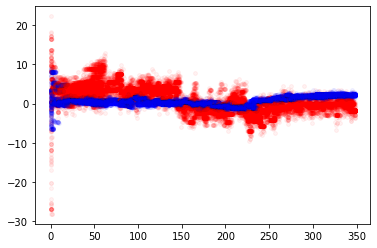

In [26]:
from IPython import display
NGEN=500
MUT_PROB=0.2
for g in range(NGEN):
    print("------------GENERATION %i------------"%g)
    #----------------<FOOD>----------------------------#
    selectedFood= toolbox.select(popFood,len(popFood))
    offSpringFood=list(map(toolbox.clone,selectedFood))
    
    for mutantFood in offSpringFood:
        if random.random()<MUT_PROB:
            toolbox.foodMutate(mutantFood)
    popFood[:]=offSpringFood
      #----------------</FOOD>----------------------------#
    
    #----------------<SNAKE>----------------------------#
    selectedSnake= toolbox.select(pop,len(pop))
    offSpringSnake=list(map(toolbox.clone,selectedSnake))
    
    for mutantSnake in offSpringSnake:
        if random.random()<MUT_PROB:
            toolbox.mutate(mutantSnake)
    pop[:]=offSpringSnake
      #----------------</SNAKE>----------------------------#
    fitnessesF,fitnessesS,appleEaten=toolbox.evaluate(popFood,pop,myNetFood,myNet,snake_game)
    #-------------------<FOOD FITNESS>------------------------------#

    for ind,fit in zip(popFood,fitnessesF):
        ind.fitness.values=fit,

#     for ind in popFood:

#         ind.fitness.values=shared_fitness(ind,popFood)
    #-------------------</FOOD FITNESS>------------------------------#

    #-------------------<SNAKE FITNESS>------------------------------#
    for ind,fit in zip(pop,fitnessesS):
        ind.fitness.values=fit,

#     for ind in pop:

#         ind.fitness.values=shared_fitness(ind,pop)
    #-------------------</SNAKE FITNESS>------------------------------#
    
    fitSnake=[ind.fitness.values[0] for ind in pop]
    fitFood=[ind.fitness.values[0] for ind in popFood]
    
    
    
    #-------------------<LOG STATS >------------------------------#
    recordFood=stats.compile(popFood)
    logbookFood.record(gen=g,**recordFood)

    
    recordSnake=stats.compile(pop)
    logbookSnake.record(gen=g,**recordSnake)
    
    recordFoodEaten=statsScore.compile(appleEaten)
    logbookFoodEaten.record(gen=g,**recordFoodEaten)
     #-------------------</LOG STATS >------------------------------#
    gen = [g] * POP_NO
    snake = [sum(x) for x in pop]
    food = [sum(x) for x in popFood]
    plt.scatter( gen, snake, color='red', s=15, alpha=0.05)
    plt.scatter( gen, food, color='blue', s=15, alpha=0.05)
    display.display(plt.gcf())
    display.clear_output(wait=True)
        

In [ ]:
print (logbookSnake)

In [ ]:
print (logbookFood)

In [ ]:


genSnake=logbookSnake.select("gen")
_minSnake=logbookSnake.select("min")
_maxSnake=logbookSnake.select("max")
avgsSnake=logbookSnake.select("avg")
stdsSnake=logbookSnake.select("std")

genFood=logbookFood.select("gen")
_minFood=logbookFood.select("min")
_maxFood=logbookFood.select("max")
avgsFood=logbookFood.select("avg")
stdsFood=logbookFood.select("std")


In [ ]:
plt.rc('axes',labelsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('legend',fontsize=14)

fig,ax1=plt.subplots()
line1=ax1.plot(genSnake,avgsSnake)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

line2=ax1.plot(genFood,avgsFood)

In [ ]:
print(logbookFoodEaten)

In [ ]:
from pandas.plotting import bootstrap_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x1 = _minSnake=logbookSnake.select("min")
y1 = _maxSnake=logbookSnake.select("max")

x2 = _minFood=logbookFood.select("min")
y2 = _maxFood=logbookFood.select("max")
plt.scatter(x1,y1,label="",color='r')
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x2,y2,label="",color='b')
plt.xlabel('x')
plt.ylabel('y')

plt.show


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
t = np.arange(NGEN)

In [ ]:
std1 = [random.uniform(0.75,1.0) for x in range(NGEN)]
std2 = [random.uniform(0.9,1.2) for x in range(NGEN)]

In [ ]:
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_xlabel('Generation')
ax.set_ylabel('Mean Fitness')
ax.plot(t, stdsSnake, lw=3, label='Snake', color='blue')
ax.fill_between(t, stdsSnake+std1, stdsSnake-std1, facecolor='blue', alpha=0.5)
ax.plot(t, stdsFood, lw=3, label='Food', color='orange')
ax.fill_between(t, stdsFood+std2, mean_fitnesses2-std2, facecolor='orange', alpha=0.5)
ax.legend(loc='best', fancybox=True, framealpha=0.5)

In [ ]:
x = logbookSnake
min = _minSnake
max = _maxSnake
avg = avgsSnake
std = stdsSnake

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
df = pd.DataFrame(dict(min=min, max=max, avg=avg, std=std))
df.boxplot()
plt.show()